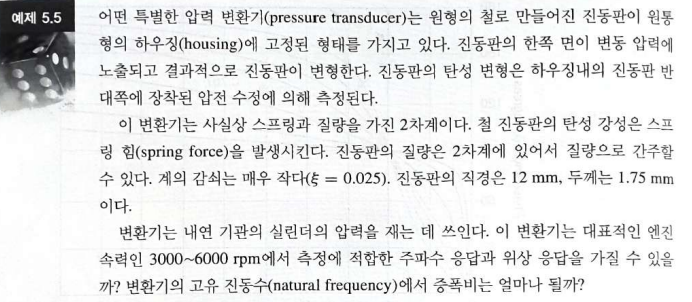

In [1]:
import numpy as np

# 주어진 상수
D = 12e-3  # 진동판 직경 (m)
t = 1.75e-3  # 진동판 두께 (m)
xi = 0.025  # 감쇠 비율
rho = 7850  # 철의 밀도 (kg/m^3)
E = 210e9  # 철의 탄성 계수 (Pa)

# 진동판의 부피
volume = np.pi * (D / 2)**2 * t

# 진동판의 질량
mass = rho * volume

# 스프링 상수 (단순화된 모델로 접근)
k = (E * t**3) / (12 * (1 - 0.3**2) * (D / 2)**2)  # 0.3은 철의 포아송 비율

# 고유 진동수 계산
omega_n = np.sqrt(k / mass)

# 고유 진동수 (Hz)로 변환
f_n = omega_n / (2 * np.pi)

print(f"변환기의 고유 진동수는 약 {f_n:.2f} Hz입니다.")


변환기의 고유 진동수는 약 6831.94 Hz입니다.


주파수 범위에서 진동판의 응답을 그래프로 표시하면 다음과 같다. <br>
아래코드는 변환기의 고유진동수와 감쇠비율에 따른 응답을 시각화한 코드이다.

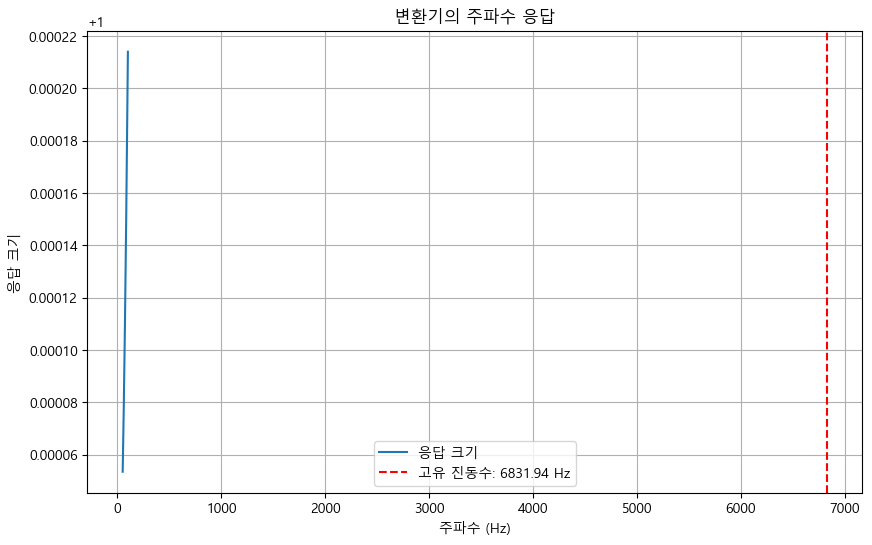

변환기의 고유 진동수는 약 6831.94 Hz입니다.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 주어진 상수
D = 12e-3  # 진동판 직경 (m)
t = 1.75e-3  # 진동판 두께 (m)
xi = 0.025  # 감쇠 비율
rho = 7850  # 철의 밀도 (kg/m^3)
E = 210e9  # 철의 탄성 계수 (Pa)

# 진동판의 부피
volume = np.pi * (D / 2)**2 * t

# 진동판의 질량
mass = rho * volume

# 스프링 상수 (단순화된 모델로 접근)
k = (E * t**3) / (12 * (1 - 0.3**2) * (D / 2)**2)  # 0.3은 철의 포아송 비율

# 고유 진동수 계산
omega_n = np.sqrt(k / mass)

# 고유 진동수 (Hz)로 변환
f_n = omega_n / (2 * np.pi)

# 측정 주파수 범위 (rpm에서 Hz로 변환)
f_min = 3000 / 60
f_max = 6000 / 60
f_range = np.linspace(f_min, f_max, 1000)

# 응답 계산
H = 1 / np.sqrt((1 - (f_range / f_n)**2)**2 + (2 * xi * f_range / f_n)**2)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(f_range, H, label='응답 크기')
plt.axvline(f_n, color='r', linestyle='--', label=f'고유 진동수: {f_n:.2f} Hz')
plt.title('변환기의 주파수 응답')
plt.xlabel('주파수 (Hz)')
plt.ylabel('응답 크기')
plt.grid(True)
plt.legend()
plt.show()

print(f"변환기의 고유 진동수는 약 {f_n:.2f} Hz입니다.")


변환기의 고유 진동수는 약 6.83 kHz입니다.
최대 엔진 진동수에서의 응답 비율: 1.00
최소 엔진 진동수에서의 응답 비율: 1.00


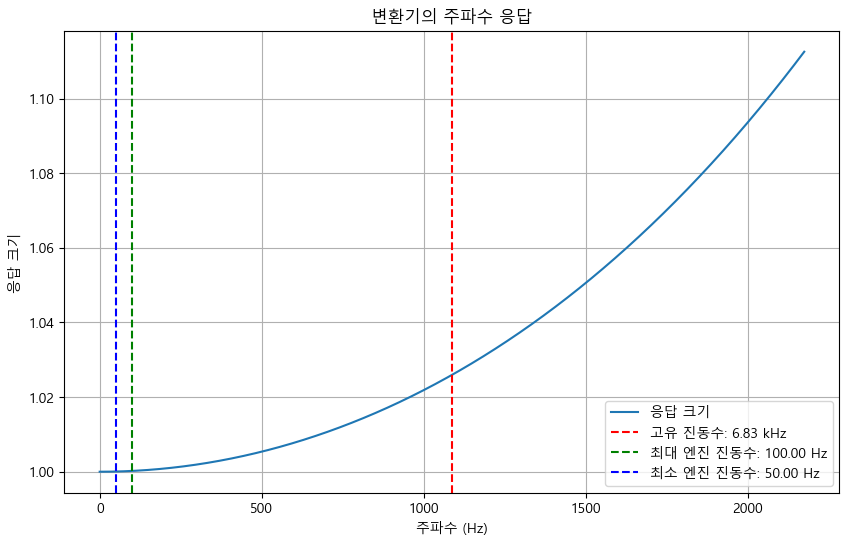

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 상수
D = 12e-3  # 진동판 직경 (m)
t = 1.75e-3  # 진동판 두께 (m)
xi = 0.025  # 감쇠 비율
rho = 7850  # 철의 밀도 (kg/m^3)
E = 210e9  # 철의 탄성 계수 (Pa)

# 진동판의 부피
volume = np.pi * (D / 2)**2 * t

# 진동판의 질량
mass = rho * volume

# 스프링 상수
k = (E * t**3) / (12 * (1 - 0.3**2) * (D / 2)**2)  # 0.3은 철의 포아송 비율

# 고유 진동수 계산
omega_n = np.sqrt(k / mass)

# 고유 진동수 (Hz)로 변환
f_n = omega_n / (2 * np.pi)
print(f"변환기의 고유 진동수는 약 {f_n / 1e3:.2f} kHz입니다.")

# 엔진의 진동수 (rad/s)
Omega_max = 6000 * (2 * np.pi) / 60
Omega_min = 3000 * (2 * np.pi) / 60

# 주파수 응답 계산
Omega_ratio_max = Omega_max / omega_n
Omega_ratio_min = Omega_min / omega_n

# 응답 크기 계산
Pd_Ps_max = 1 / np.sqrt((1 - Omega_ratio_max**2)**2 + (2 * xi * Omega_ratio_max)**2)
Pd_Ps_min = 1 / np.sqrt((1 - Omega_ratio_min**2)**2 + (2 * xi * Omega_ratio_min)**2)

print(f"최대 엔진 진동수에서의 응답 비율: {Pd_Ps_max:.2f}")
print(f"최소 엔진 진동수에서의 응답 비율: {Pd_Ps_min:.2f}")

# 주파수 응답 시각화
f_range = np.linspace(0, f_n * 2 / (2 * np.pi), 1000)
omega_range = f_range * 2 * np.pi
H = 1 / np.sqrt((1 - (omega_range / omega_n)**2)**2 + (2 * xi * omega_range / omega_n)**2)

plt.figure(figsize=(10, 6))
plt.plot(f_range, H, label='응답 크기')
plt.axvline(f_n / (2 * np.pi), color='r', linestyle='--', label=f'고유 진동수: {f_n / 1e3:.2f} kHz')
plt.axvline(Omega_max / (2 * np.pi), color='g', linestyle='--', label=f'최대 엔진 진동수: {Omega_max / (2 * np.pi):.2f} Hz')
plt.axvline(Omega_min / (2 * np.pi), color='b', linestyle='--', label=f'최소 엔진 진동수: {Omega_min / (2 * np.pi):.2f} Hz')
plt.title('변환기의 주파수 응답')
plt.xlabel('주파수 (Hz)')
plt.ylabel('응답 크기')
plt.grid(True)
plt.legend()
plt.show()


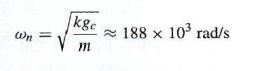

In [6]:
# wn = 188e3
# wn=wn**2
# m=3.7
# k=131e6
# gc=(m/k)*wn
# gc

In [17]:
gc = 9.9
k = 131e6
m = 3.7

wn = np.sqrt(gc*k/m)

In [18]:
print(f"{wn:.3f}")

18722.006
